In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [67]:
# Загрузка датасета iris
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [69]:
# Описание датасета
print("Описание датасета Iris:")
print(data.DESCR)

Описание датасета Iris:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% fo

In [71]:
# Разведочный анализ данных
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [73]:
print("\nСтатистическое описание данных:")
print(df.describe())


Статистическое описание данных:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [75]:
# Проверка на пропущенные значения
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())


Количество пропущенных значений в каждом столбце:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


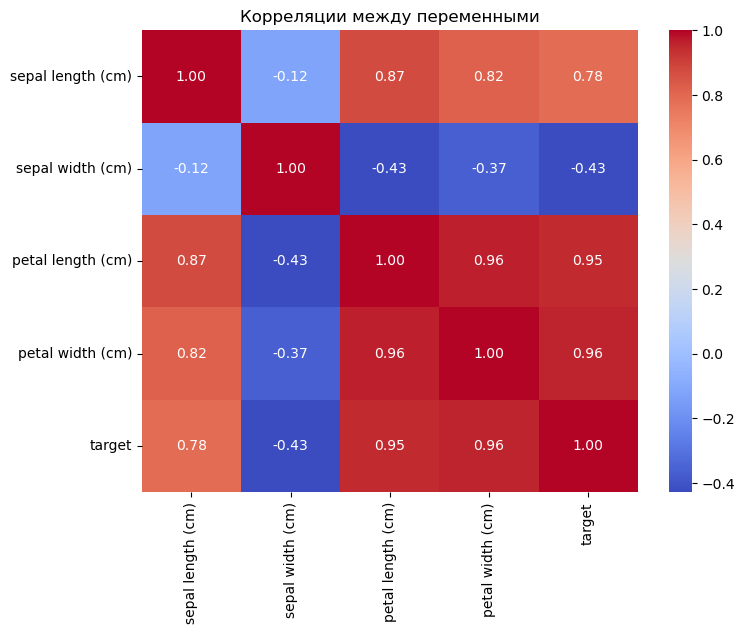

In [77]:
# Корреляции между переменными
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляции между переменными")
plt.show()

<Figure size 1000x600 with 0 Axes>

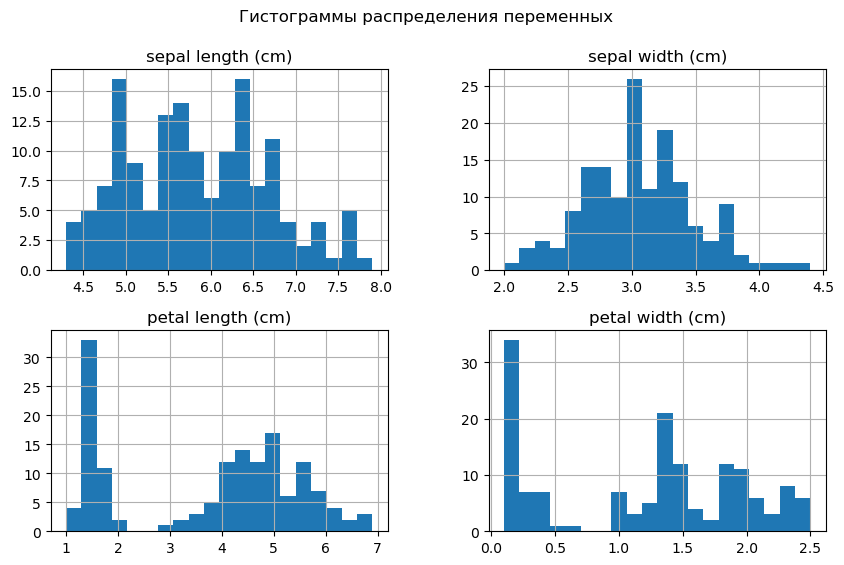

In [78]:
# Распределение данных
plt.figure(figsize=(10, 6))
df.drop(columns=['target']).hist(bins=20, figsize=(10, 6))
plt.suptitle("Гистограммы распределения переменных")
plt.show()

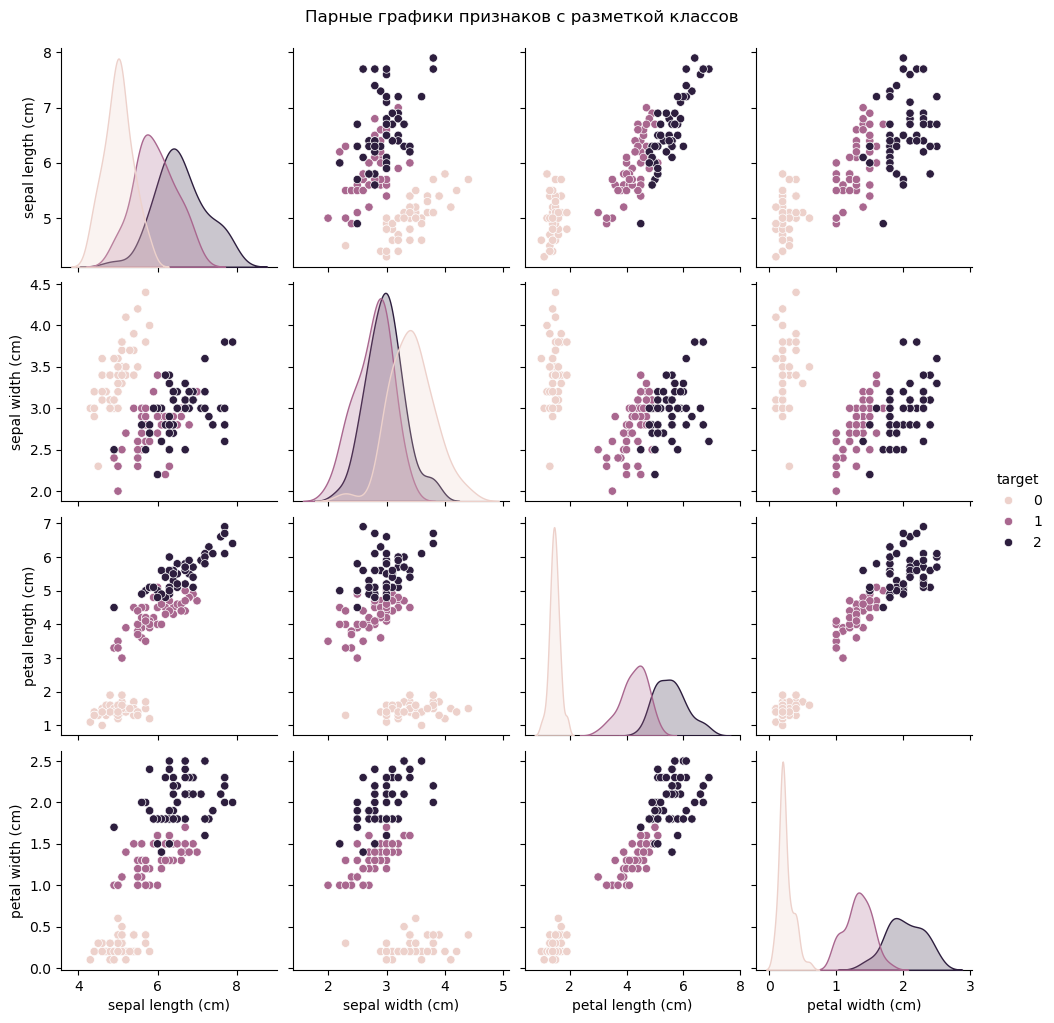

In [80]:
# Визуализация распределения данных с помощью pairplot
sns.pairplot(df, hue='target', diag_kind='kde')
plt.suptitle("Парные графики признаков с разметкой классов", y=1.02)
plt.show()

In [81]:
# Кластеризация K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df.iloc[:, :-1])

C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [82]:
# Кластеризация DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(df.iloc[:, :-1])

In [83]:
# Кластеризация Agglomerative
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df.iloc[:, :-1])

In [84]:
# Добавление кластеров в датафрейм
df['K-Means'] = kmeans_labels
df['DBSCAN'] = dbscan_labels
df['Agglomerative'] = agglo_labels

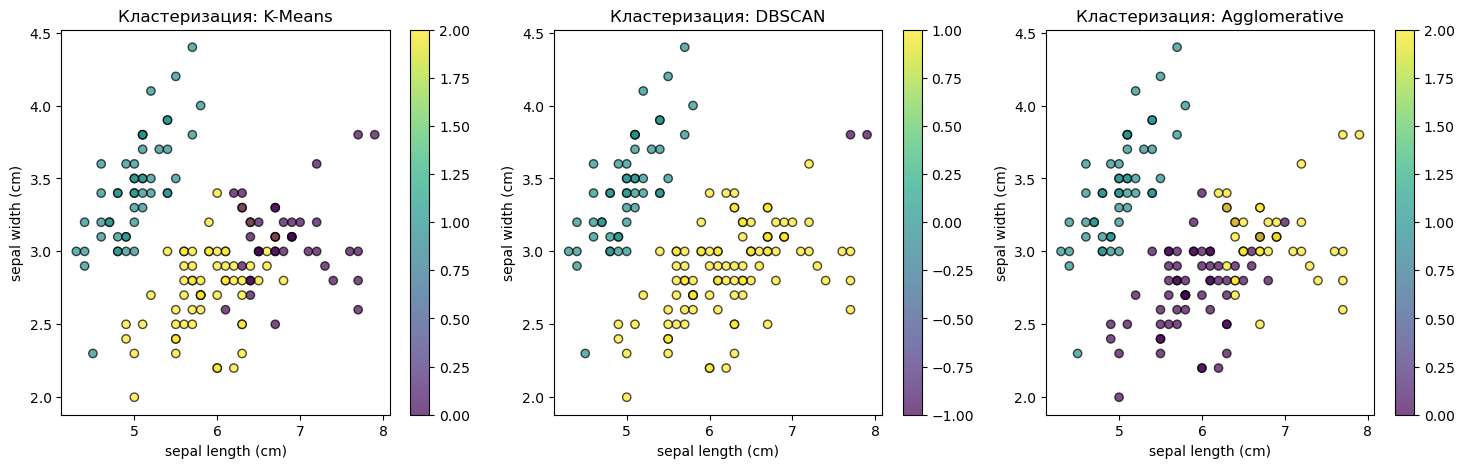

In [85]:
# Визуализация результатов кластеризации
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
methods = [kmeans_labels, dbscan_labels, agglo_labels]
titles = ["K-Means", "DBSCAN", "Agglomerative"]

for ax, labels, title in zip(axes, methods, titles):
    scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
    ax.set_title(f"Кластеризация: {title}")
    ax.set_xlabel(data.feature_names[0])
    ax.set_ylabel(data.feature_names[1])
    plt.colorbar(scatter, ax=ax)

plt.show()

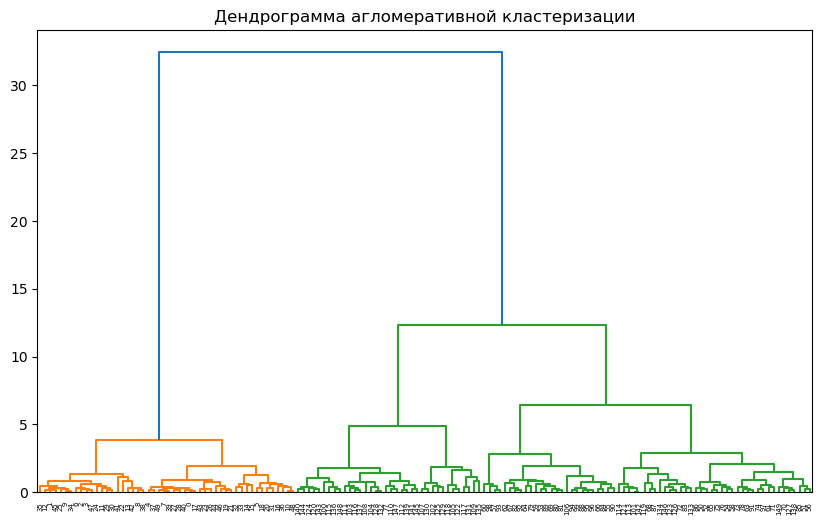

In [87]:
# Дендрограмма для агломеративной кластеризации
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(df.iloc[:, :-4], method='ward')
dendrogram(linkage_matrix)
plt.title("Дендрограмма агломеративной кластеризации")
plt.show()

In [91]:
# Метрики качества кластеризации
def evaluate_clustering(true_labels, pred_labels, method_name):
    print(f"Метрики для {method_name}:")
    print("Homogeneity:", homogeneity_score(true_labels, pred_labels))
    print("Completeness:", completeness_score(true_labels, pred_labels))
    print("V-measure:", v_measure_score(true_labels, pred_labels))
    print("Adjusted Rand Index:", adjusted_rand_score(true_labels, pred_labels))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(true_labels, pred_labels))
    print("\n")

evaluate_clustering(data['target'], kmeans_labels, "K-Means")
evaluate_clustering(data['target'], dbscan_labels, "DBSCAN")
evaluate_clustering(data['target'], agglo_labels, "Agglomerative")

Метрики для K-Means:
Homogeneity: 0.7364192881252849
Completeness: 0.7474865805095324
V-measure: 0.7419116631817836
Adjusted Rand Index: 0.7163421126838476
Adjusted Mutual Info Score: 0.7386548254402864


Метрики для DBSCAN:
Homogeneity: 0.5879164116696249
Completeness: 0.9202400768446993
V-measure: 0.7174643320814477
Adjusted Rand Index: 0.5637510205230709
Adjusted Mutual Info Score: 0.7125764811325073


Метрики для Agglomerative:
Homogeneity: 0.7608008469718723
Completeness: 0.7795958005591144
V-measure: 0.7700836616487869
Adjusted Rand Index: 0.7311985567707746
Adjusted Mutual Info Score: 0.7671669615713111




In [93]:
# Сравнение результатов кластеризации
print("\nРаспределение меток K-Means:")
print(pd.Series(kmeans_labels).value_counts())

print("\nРаспределение меток DBSCAN:")
print(pd.Series(dbscan_labels).value_counts())

print("\nРаспределение меток Agglomerative Clustering:")
print(pd.Series(agglo_labels).value_counts())



Распределение меток K-Means:
2    61
1    50
0    39
Name: count, dtype: int64

Распределение меток DBSCAN:
 1    98
 0    50
-1     2
Name: count, dtype: int64

Распределение меток Agglomerative Clustering:
0    64
1    50
2    36
Name: count, dtype: int64
